In [5]:
#pip install folium

In [6]:
#conda install basemap

In [17]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from ipywidgets import interact
import pickle
import time
from sklearn.decomposition import PCA
from mpl_toolkits.basemap import Basemap
import folium
import warnings
warnings.filterwarnings('ignore')

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'stars'}>,
        <AxesSubplot:title={'center':'review_count'}>],
       [<AxesSubplot:title={'center':'is_open'}>, <AxesSubplot:>]],
      dtype=object)

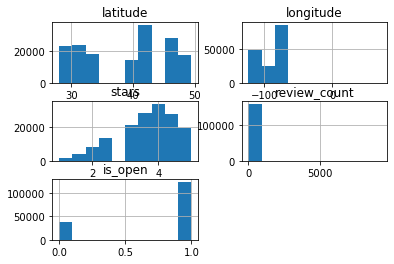

In [18]:
datagraph = pd.read_json('yelp_academic_dataset_business.json',lines = True)
#removed states with no data
dfgraph = datagraph[datagraph.state.isin(["BC","CO","FL","GA","MA","OR","OH","TX","WA"])]
dfgraph.hist()

Text(0.5, 1.0, 'Stars Compared to Average number of Businesses Open')

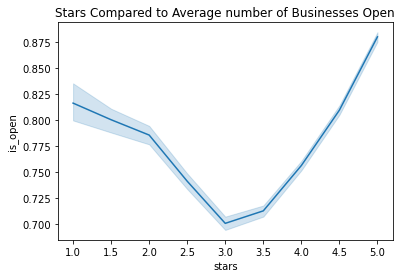

In [19]:
#created graph comparing stars and is_open
sns.lineplot(x="stars", y="is_open",data=dfgraph)
plt.title('Stars Compared to Average number of Businesses Open')

Text(0.5, 1.0, 'Average Businesses Open in Each State')

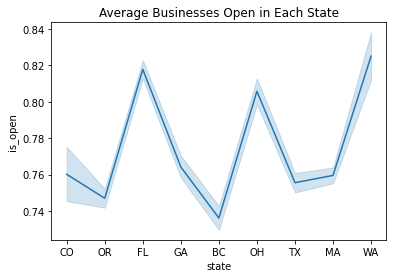

In [20]:
#created graph comparing state and is_open
sns.lineplot(x="state", y="is_open",data=dfgraph)
plt.title('Average Businesses Open in Each State')

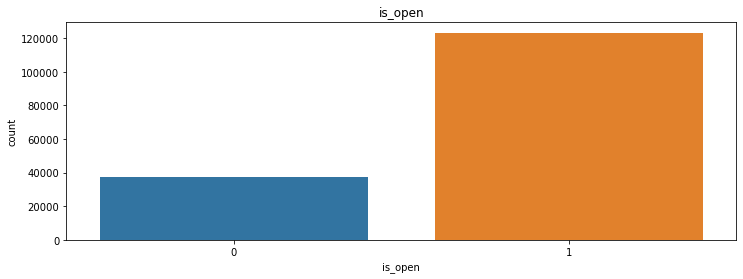

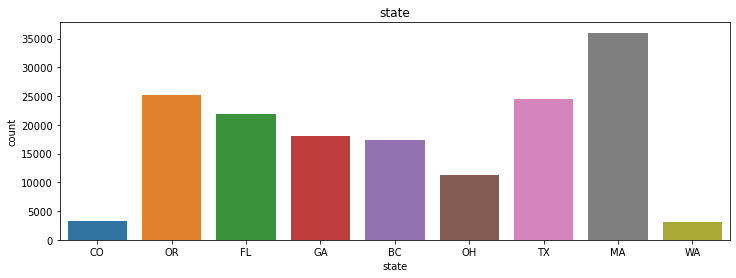

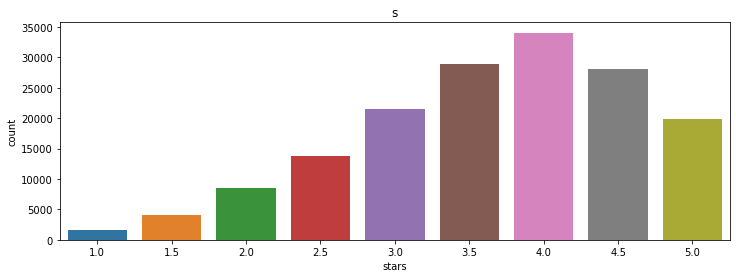

In [21]:
#graph to show total is_open
plt.figure(figsize=(12,4))
ax = sns.countplot(dfgraph['is_open'])
plt.title('is_open');
#graph to show total businesses per state
plt.figure(figsize=(12,4))
ax = sns.countplot(dfgraph['state'])
plt.title('state');

#graph to show total stars given
plt.figure(figsize=(12,4))
ax = sns.countplot(dfgraph['stars'])
plt.title('s');
plt.show()

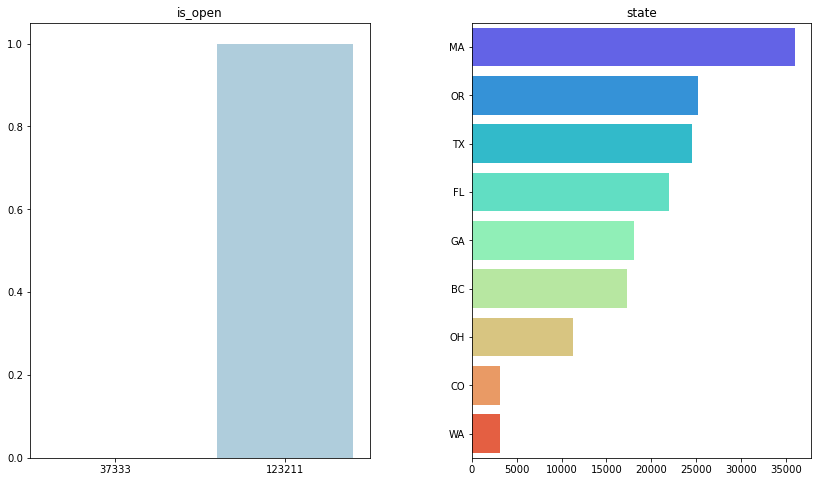

In [22]:
# different type of graph for is_open and state
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = dfgraph['is_open'].value_counts()[:20].to_frame()

sns.barplot(cnt['is_open'], cnt.index, palette = 'RdBu', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('is_open')

cnt = dfgraph['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('state')
plt.subplots_adjust(wspace=0.3)

In [23]:
# made a folium map of the US showind the total number of is_open per state
import folium
state_geo = 'us-states.json'

map = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(geo_data=state_geo, data=dfgraph,
             columns=['state','is_open'],
             key_on='feature.id',
             fill_color='BuGn', fill_opacity=.7, line_opacity=0.1,
             legend_name='is_open', smooth_factor=0.1,highlight=True).add_to(map)
folium.LayerControl().add_to(map)

map

In [ ]:
#used basemap to show a similar map of where our data is located
fig = plt.figure(figsize=(14, 8), edgecolor='w')
m = Basemap(projection='cyl',llcrnrlon= -180, urcrnrlon = 180, llcrnrlat = -90, urcrnrlat= 90,resolution='c',
          lat_ts = True)
m.drawcoastlines()
m.fillcontinents(color='Green',lake_color='Blue')
m.drawcountries()
m.drawmapboundary(fill_color='#FFFFFF')

mloc = m(datagraph['latitude'].tolist(),datagraph['longitude'].tolist())
m.scatter(mloc[1],mloc[0],color ='red',lw=3,alpha=0.3,zorder=5)

In [24]:
data = pd.read_json('yelp_academic_dataset_business.json', lines=True, orient='columns', encoding='utf-8')

In [25]:
df1 = data.mask(data.astype(object).eq('None')).dropna()

df2 = pd.json_normalize(df1['attributes'])

df1 = df1.drop(["attributes", "hours"], axis = 1)

df_concat = pd.concat([df1, df2], axis=1)

In [26]:
df_concat['categories'] = df_concat['categories'].str.lower()
df = df_concat.loc[df_concat.categories.str.contains("restaurant|food|deli|pizza|cafe", na=False)]

In [27]:
df = df.replace(['',' ','NULL'],np.nan)

In [28]:
temp = df.dropna(thresh=df.shape[0]*0.4,how='all',axis=1)

In [29]:
temp = temp.dropna(how='any')

In [30]:
temp = temp.drop(["business_id", "name", "address", "categories", "BusinessParking", "city"], axis = 1)
temp = temp[temp.postal_code.apply(lambda x: x.isnumeric())]

In [31]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(temp['state'])
dfx = pd.DataFrame(hashed_features.toarray())
dfx.columns = ['state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5']
hashed = pd.concat([temp.reset_index(drop=True), dfx.reset_index(drop=True)], axis=1)
hashed

,state,postal_code,latitude,longitude,stars,review_count,is_open,BikeParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,state_0,state_1,state_2,state_3,state_4,state_5
0,CO,80302,40.017544,-105.283348,4.0,86.0,1.0,True,True,2,0.0,0.0,0.0,-1.0,1.0,0.0
1,OR,97218,45.588906,-122.593331,4.0,126.0,1.0,False,True,2,0.0,0.0,0.0,1.0,1.0,0.0
2,CO,80302,39.998449,-105.281006,3.5,5.0,1.0,True,True,2,0.0,0.0,0.0,-1.0,1.0,0.0
3,MA,01960,42.541155,-70.973438,4.0,39.0,1.0,True,True,2,0.0,0.0,0.0,0.0,2.0,0.0
4,MA,02128,42.363442,-71.025781,3.5,856.0,1.0,True,True,2,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14816,OR,97005,45.492267,-122.787117,3.5,197.0,0.0,True,True,1,0.0,0.0,0.0,1.0,1.0,0.0
14817,OR,97213,45.536427,-122.618696,3.5,59.0,1.0,True,True,2,0.0,0.0,0.0,1.0,1.0,0.0
14818,MA,02145,42.395540,-71.079465,3.0,14.0,1.0,False,True,4,0.0,0.0,0.0,0.0,2.0,0.0
14819,MA,02120,42.332385,-71.099752,4.5,105.0,0.0,True,True,2,0.0,0.0,0.0,0.0,2.0,0.0


In [32]:
hashed = hashed.drop("state", axis=1)
d = {"True" : 1, "False" : 0}
hashed["BikeParking"] = hashed["BikeParking"].replace(d)
hashed["BusinessAcceptsCreditCards"] = hashed["BusinessAcceptsCreditCards"].replace(d)
hashed = hashed.replace({'None' : 0})
hashed

,postal_code,latitude,longitude,stars,review_count,is_open,BikeParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,state_0,state_1,state_2,state_3,state_4,state_5
0,80302,40.017544,-105.283348,4.0,86.0,1.0,1,1,2,0.0,0.0,0.0,-1.0,1.0,0.0
1,97218,45.588906,-122.593331,4.0,126.0,1.0,0,1,2,0.0,0.0,0.0,1.0,1.0,0.0
2,80302,39.998449,-105.281006,3.5,5.0,1.0,1,1,2,0.0,0.0,0.0,-1.0,1.0,0.0
3,01960,42.541155,-70.973438,4.0,39.0,1.0,1,1,2,0.0,0.0,0.0,0.0,2.0,0.0
4,02128,42.363442,-71.025781,3.5,856.0,1.0,1,1,2,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14816,97005,45.492267,-122.787117,3.5,197.0,0.0,1,1,1,0.0,0.0,0.0,1.0,1.0,0.0
14817,97213,45.536427,-122.618696,3.5,59.0,1.0,1,1,2,0.0,0.0,0.0,1.0,1.0,0.0
14818,02145,42.395540,-71.079465,3.0,14.0,1.0,0,1,4,0.0,0.0,0.0,0.0,2.0,0.0
14819,02120,42.332385,-71.099752,4.5,105.0,0.0,1,1,2,0.0,0.0,0.0,0.0,2.0,0.0


In [33]:
feature_vectors = hashed.drop("is_open", axis=1)
class_labels = hashed["is_open"]
train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels,random_state=202, test_size=0.25)

In [34]:
n_components = 1 # This is much less than the original n_features

print("Extracting the top %d eigenfaces from %d faces" % (n_components, train_vectors.shape[0]))

#Set up the pca object with the number of compoents we want to find
pca = PCA(n_components=n_components, whiten=True)

#Fit the training data to the pca model.
_ = pca.fit(train_vectors)

total_variance = np.sum(pca.explained_variance_ratio_)*100
print("These %d eigenvectors account for a total of %d percent of the total variance in the original dataset"
      % (n_components, total_variance))


pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)

print("Training set changed from a size of: ", train_vectors.shape, ' to: ', pca_train_vectors.shape)
print("Testing set changed from a size of: ", test_vectors.shape, ' to: ', pca_test_vectors.shape)

Extracting the top 1 eigenfaces from 11115 faces
These 1 eigenvectors account for a total of 99 percent of the total variance in the original dataset
Training set changed from a size of:  (11115, 14)  to:  (11115, 1)
Testing set changed from a size of:  (3706, 14)  to:  (3706, 1)


In [35]:
pca_train_vectors

array([[ 0.94925844],
       [ 0.94888355],
       [-0.07643797],
       ...,
       [ 1.47582896],
       [-0.37586746],
       [-0.37823383]])

In [36]:
filename = 'predict_open_pca.p'
rerun = False
if rerun:
    start = time.time()

    #make some temporary variables so you can change this easily
    tmp_vectors = pca_train_vectors
    tmp_labels = train_labels

    print("Fitting the classifier to the training set")
    param_grid = {'C': [1e3, 5e3, 1e4],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01],
                   'kernel' : ['linear']}
    clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, n_jobs=-1)
    clf = clf.fit(tmp_vectors, tmp_labels)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

    end = time.time()
    print("Runtime",end - start)

    pickle.dump(clf, open(filename, 'wb'))
else:
    clf = pickle.load(open(filename, 'rb'))

In [37]:
predict_vectors = pca_test_vectors
true_labels = test_labels

print("Predicting if the business is open on test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(2)))

Predicting if the business is open on test set
              precision    recall  f1-score   support

         0.0       0.36      0.39      0.37      1171
         1.0       0.70      0.68      0.69      2535

    accuracy                           0.58      3706
   macro avg       0.53      0.53      0.53      3706
weighted avg       0.59      0.58      0.59      3706

[[ 451  720]
 [ 818 1717]]
